<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Predicting "Greenness" of Content

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---


This data set comes from [StumbleUpon](https://www.stumbleupon.com/), a web page recommender, and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv).

Below is a description of the columns:

FieldName|Type|Description
---------|----|-----------
url|string|URL of the web page to be classified
urlid|integer| StumbleUpon's unique identifier for each URL
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available AlchemyAPI found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available AlchemyAPI found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|Number of links sharing at least one word with one other link/number of links
commonLinkRatio_2|double|Number of links sharing at least one word with two other links/number of links
commonLinkRatio_3|double|Number of links sharing at least one word with three other links/number of links
commonLinkRatio_4|double|Number of links sharing at least one word with four other links/number of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy).
embed_ratio|double|Count of the number of <embed> usages
frameBased|integer (0 or 1)|A page is frame based (1) if it has no body markup but has a frameset markup
frameTagRatio|double|Ratio of the iframe markups over the total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains a URL with a domain
html_ratio|double|Ratio of tags vs. text in the page
image_ratio|double|Ratio of <img> tags vs. text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this web page is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least three <a>'s text contain more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are hyperlinks
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this web page is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>| Markups
numwords_in_url| double|Number of words in URL
parametrizedLinkRatio|double|A link is parametrized if it's URL contains parameters or has an attached onclick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

# Set max printout options for Pandas.
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

### 1) Load the data.
- Note that it's a `.tsv` file and has a tab separator instead of comma.
- Clean the `is_news` column.
- Create two new columns, `title` and `body`, from the `boilerplate` column.

> **Note:** The `boilerplate` column is in JSON dictionary format. You can use the `json.loads()` function from the `json` module to convert this into a Python dictionary.

In [3]:
evergreen_tsv = './datasets/evergreen_sites.tsv'

In [4]:
# A:
data = pd.read_csv(evergreen_tsv, sep='\t', na_values={'is_news' : '?'}).fillna(0)

In [5]:
# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

### 2) What are "evergreen" sites?
- These are websites that have content that's always relevant — like recipes or reviews — as opposed to current events.
- "Evergreen" is stored as a binary indicator in the `label` column.
- Let's look at some examples:

In [11]:
# A:
data.loc[data.label == 1].head(3)
data.loc[data.label == 0].head(3)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html,4042,"{""title"":""IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries"",""body"":""A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1.0,1,24,0,5424,170,8,0.152941,0.079130,0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose Califor...
4,http://bleacherreport.com/articles/1205138-the-50-coolest-jerseys-you-didnt-know-existed?show_full=,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen"",""body"":""Jersey sales is a curious business Whether you re buying the stylish top to represent your favorite team player or color you re always missing out on better artwork With No 18 Colts jerseys continu...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1.0,1,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen,Jersey sales is a curious business Whether you re buying the stylish top to represent your favorite team player or color you re always missing out on better artwork With No 18 Colts jerseys continuing to flood the streets it s about time we educate the sports public about the real masterpieces t...
5,http://www.conveniencemedical.com/genital-herpes-home.php,7018,"{""url"":""conveniencemedical genital herpes home php"",""title"":""Genital Herpes Treatment "",""body"":""Genital herpes is caused by herpes simplex virus HSV 1 the most common type usually appears as cold sores on the mouth and lips whereas HSV 2 affects the genitals buttocks and rectum Patient s have re...",?,?,119.000000,0.745455,0.581818,0.290909,0.018182,0.434639,0.0,0,0.019841,0,0.298300,0.038636,0.0,0,12,?,4368,55,3,0.054545,0.087356,0,Genital Herpes Treatment,Genital herpes is caused by herpes simplex virus HSV 1 the most common type usually appears as cold sores on the mouth and lips whereas HSV 2 affects the genitals buttocks and rectum Patient s have reported that symptoms can appear five days after coming into contact with the virus on the other ...


### 3) Does being a news site affect greenness?

**3.A Investigate with plots/EDA.**

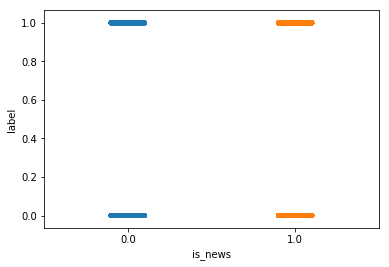

In [24]:
# A:
df = data[['is_news', 'label']]

df.corr()

sns.stripplot(x="is_news", y="label", data=df, jitter=True);

**3.B) Test the hypothesis with a logistic regression using statsmodels.**

> **Hint:** The `sm.logit` function from `statsmodels.formula.api` will perform a logistic regression using a formula string.  If you want to stick with `sklearn`, you may change the import below to use `sklearn`.

In [25]:
from sklearn.linear_model import LogisticRegression

In [36]:
# A:
X = df['is_news'].values.reshape(-1, 1)
y= df['label'].values
lr = LogisticRegression()
model = lr.fit(X, y)
print('Coefficient:    ', model.coef_)
print('Intercept:      ', model.intercept_)
print('Predicted probabilities:   ', model.predict_proba(1))

Coefficient:     [[ 0.03739369]]
Intercept:       [ 0.03026172]
Predicted probabilities:    [[ 0.48309259  0.51690741]]


**3.C) Interpret the results of your model.**

In [8]:
# A:If the website is a news website, the probabiltiy that it is rated as green is ~52%. 

### 4) Does the website category affect greenness?

**4.A) Investigate with plots/EDA.**

/Users/slevin886/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


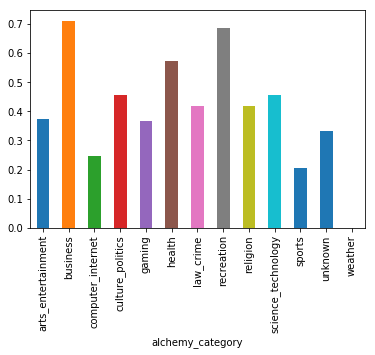

In [67]:
# A:
new_df = data[['alchemy_category', 'label']]
mask = data['alchemy_category'] == '?'
new_df = new_df.drop(new_df[mask].index).reset_index(drop=True)
mask2 = data['alchemy_category'] == 'unknown'
new_df = new_df.drop(new_df[mask2].index).reset_index(drop=True)
for_bars = new_df.groupby('alchemy_category')['label'].mean()
for_bars.plot(kind='bar')

**4.B) Test the hypothesis with a logistic regression.**

In [76]:
# A:
y = new_df['label'].values
X = pd.get_dummies(new_df['alchemy_category'])
lr = LogisticRegression()
model = lr.fit(X.values, y)
print('Coefficient:    ', model.coef_)
print('Intercept:      ', model.intercept_)
print('Predicted probabilities:   ',model.predict_proba(X.values))


Coefficient:     [[-0.21685595  1.20141681 -0.79181516  0.13495519 -0.22050795  0.59239828
  -0.01724202  1.07695578 -0.02876027  0.13077284 -1.03112329 -0.22368229
  -0.91255217]]
Intercept:       [-0.3060402]
Predicted probabilities:    [[ 0.29000153  0.70999847]
 [ 0.31628108  0.68371892]
 [ 0.4288957   0.5711043 ]
 ..., 
 [ 0.54266723  0.45733277]
 [ 0.31628108  0.68371892]
 [ 0.62782474  0.37217526]]


**4.C Interpret the model results.**

In [11]:
# A: Yes- there are different probabilities associated with different website categories.

### 5) Does the image ratio affect greenness?

**5.A) Investigate with plots/EDA.**

In [80]:
# A:
df3 = data[['label', 'image_ratio']]
mask = df3['image_ratio'] < 0
df3 = df3.drop(df3[mask].index)


In [89]:
mask2 = df3['image_ratio'] > 20
df3 = df3.drop(df3[mask2].index)

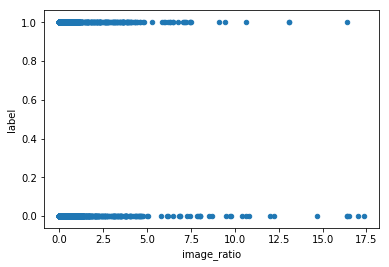

In [90]:
df3.plot(kind='scatter', x='image_ratio', y='label')

In [92]:
df3['image_ratio'] = (df3['image_ratio'] - df3['image_ratio'].mean()) / df3['image_ratio'].std()

**5.B) Test the hypothesis using a logistic regression.**

> **Note**: It's worth thinking about how to best represent this variable. It may not be wise to input the image ratio as is.

In [100]:
# A:
y = df3['label'].values
X = df3['image_ratio'].values.reshape(-1, 1)
lr = LogisticRegression()
model = lr.fit(X, y)
print('Coefficient:    ', model.coef_)
print('Intercept:      ', model.intercept_)
print('Predicted probabilities:   ',model.predict_proba(X))


Coefficient:     [[-0.119104]]
Intercept:       [ 0.0894928]
Predicted probabilities:    [[ 0.46727954  0.53272046]
 [ 0.46972338  0.53027662]
 [ 0.47064293  0.52935707]
 ..., 
 [ 0.47368494  0.52631506]
 [ 0.48056853  0.51943147]
 [ 0.49806847  0.50193153]]


**5.C) Interpret the model.**

In [14]:
# A:The negative coefficnet tells us that as the ratio of images increases the probability 
# that the site is rated green decreases (at least according to our sample data)

### 6) Fit a logistic regression with multiple predictors.
- The choice of predictors is up to you. Test features you think may be valuable to predicting evergreen status.
- Perform any EDA you may need.
- Interpret the coefficients of the model.

> **Tip:** [This PDF](https://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf) is useful for gaining an overview of interpreting logistic regression coefficients.

In [15]:
# A: